## 监督学习经典模型
### 监督学习的基本结构和流程
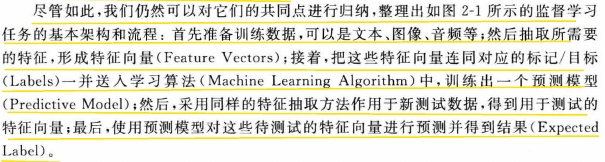

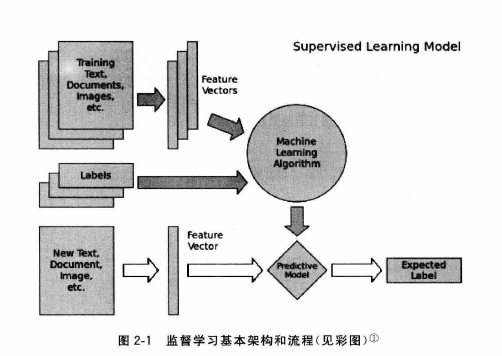

## 分类学习
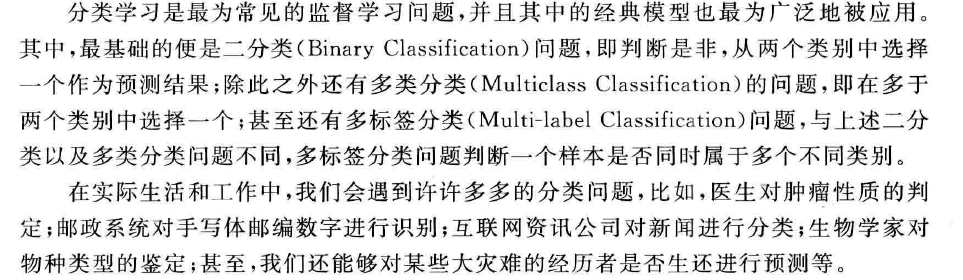
### 1.线性分类器（癌症诊断例子）

In [ ]:
import numpy as np
import pandas as pd

#创建特征列表
column_names = ['Sample code number' , 'Clump Thickness' , 'Unifoemity of Cell Size' , ' Uniformity of Cell Shape'
               ' Marginal Adhesion' , 'Single Epithelial Cell Size' , 'Bare Nulei' , 'Bland Chromation' , 'Normal Nucleoli' ,
               'Mitoses' , 'Class']
#read the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/braeast-cancer-wiscomsin/breast-cancer-wisconsin.data' , names = column_names)
#替换缺失值
data = data.replace(to_replace = '?' , value = np.nan)
#丢失缺失值
data = data.dropna(how = 'any')
#输出data的数据和维度
# print('the data\'shape is: ' + str(data.shape))
# print('the data is :' + str(data[:10]))

from sklearn.cross_validation import train_test_split
#对数据进行分割
x_train,x_test,y_train,y_test = train_test_split(data[column_names[1:10]] , data[column_names[10]] ,test_size = 0.25 ,random_state = 33)
#检查样本的数量和类别分布
print(y_train.value_counts())
print(y_test.value_counts())

#开始机器学习
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression , SGDClassifier

#对训练样本和测试样本进行缩放
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
#定义LogisticRegression分类模型和SGDClassifier分类模型
lr = LogisticRegression()
sgdc = SGDClassifier()
#训练模型参数
lr.fit(x_train ,y_train)
sgdc.fit(x_train , y_train)
#对训练好的模型进行测试
pre_lr = lr.predict(x_test)
pre_sgdc = sgdc.predict(x_test)


### 小结
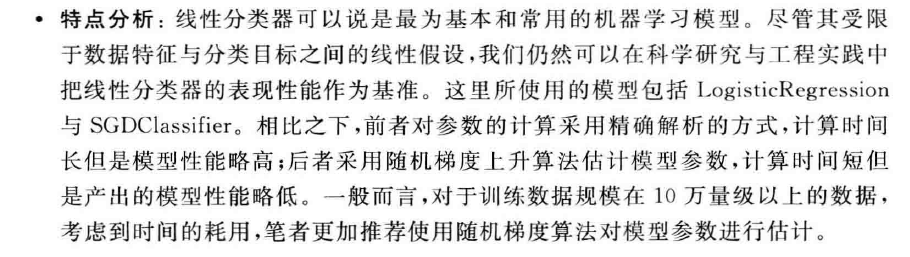

### 2.SVM（手写字体识别）
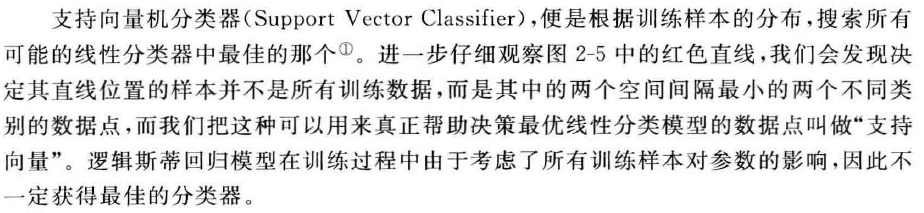

In [3]:
from sklearn.datasets import load_digits
#load the data
data = load_digits()
print(data.data.shape)

(1797, 64)


In [4]:
from sklearn.cross_validation import train_test_split
#spilt the data into test set and train set
x_train , x_test , y_train , y_test = train_test_split(data.data , data.target , test_size = 0.25 , random_state = 33)
print('the size of train set:' + str(y_train.shape))
print('the size of test set :' + str(y_test.shape))

the size of train set:(1347,)
the size of test set :(450,)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

#standrize the train data and the test data
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
#define  the SVM classfier
lsvc = LinearSVC()
#start train
lsvc.fit(x_train ,y_train)
#prediction the output
pre = lsvc.predict(x_test)
#calculate the accuracy 
print('the lsvc mode\'s accuracy is :' + str(lsvc.score(x_test ,y_test)))

the lsvc mode's accuracy is :0.948888888889


In [6]:
#anynize the output 
from sklearn.metrics import classification_report
print(classification_report(y_test , pre ))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94        35
          1       0.95      0.98      0.96        54
          2       0.98      1.00      0.99        44
          3       0.93      0.93      0.93        46
          4       0.97      1.00      0.99        35
          5       0.94      0.94      0.94        48
          6       0.96      0.98      0.97        51
          7       0.90      1.00      0.95        35
          8       0.98      0.83      0.90        58
          9       0.95      0.91      0.93        44

avg / total       0.95      0.95      0.95       450



### 小结
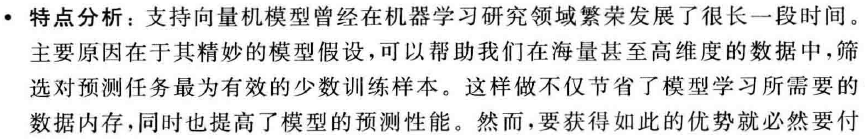

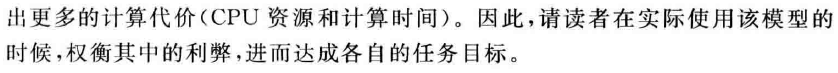

### 3.朴素贝叶斯
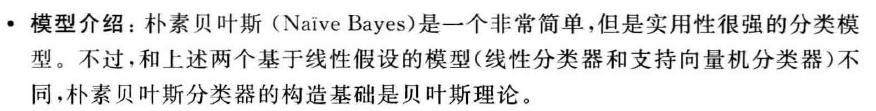

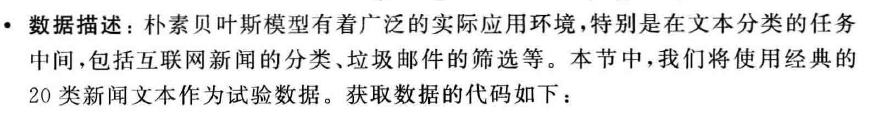

In [3]:
from sklearn.datasets import fetch_20newsgroups

#load the data from the net
news = fetch_20newsgroups(subset = 'all')
print(len(news.data))
print(news.data[0])
print(len(news.target))
print(news.target[0])

18846
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


18846
10


In [22]:
from sklearn.cross_validation import train_test_split
import numpy as np

#split the data into test set and train set
x_train , x_test , y_train , y_test = train_test_split(news.data , news.target ,test_size = 0.3 ,random_state = 33)
from sklearn.feature_extraction.text import CountVectorizer
#change the text to vector
# vec = CountVectorizer()
# x_train = vec.fit_transform(x_train)
# x_test = vec.fit_transform(x_test)
vec=CountVectorizer()  
x_train=vec.fit_transform(x_train)  
#X_test=vec.fit_transform(X_test)  raise ValueError('dimension mismatch')  
vectorizer_test = CountVectorizer(vocabulary=vec.vocabulary_)  
x_test = vectorizer_test.transform(x_test)  

print('x_train\'s shape is :' + str(x_train.shape))
print('x_test\'s shape is :' + str(x_test.shape))

x_train's shape is :(13192, 147478)
x_test's shape is :(5654, 147478)


#### 注意：在向量化的时候不能直接写 
<code>vec = CountVectorizer()
x_train = vec.fit_transform(x_train)
x_test = vec.fit_transform(x_test)</code>
#### 而是要这样写，否则会出现维度不匹配的问题
<code>vec=CountVectorizer()  
x_train=vec.fit_transform(x_train)  
vectorizer_test = CountVectorizer(vocabulary=vec.vocabulary_)  
x_test = vectorizer_test.transform(x_test)  </code>

In [23]:
from sklearn.naive_bayes import MultinomialNB
#define the bayes classfier
mnb = MultinomialNB()
#start train
mnb.fit(x_train ,y_train)
#prediction the output
pre = mnb.predict(x_test)
#calculate the accuracy
print("naive bayes mode\'s accuracy is " + str(mnb.score(x_test ,y_test)))

naive bayes mode's accuracy is 0.836222143615


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test , pre , target_names = news.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.87      0.86       247
           comp.graphics       0.60      0.86      0.71       289
 comp.os.ms-windows.misc       0.90      0.09      0.16       298
comp.sys.ibm.pc.hardware       0.59      0.88      0.71       287
   comp.sys.mac.hardware       0.92      0.78      0.84       271
          comp.windows.x       0.82      0.85      0.83       319
            misc.forsale       0.91      0.67      0.77       306
               rec.autos       0.88      0.88      0.88       283
         rec.motorcycles       0.99      0.90      0.94       332
      rec.sport.baseball       0.98      0.93      0.95       293
        rec.sport.hockey       0.93      0.99      0.96       286
               sci.crypt       0.83      0.98      0.90       291
         sci.electronics       0.84      0.87      0.86       298
                 sci.med       0.91      0.93      0.92       296
         

#### 小结
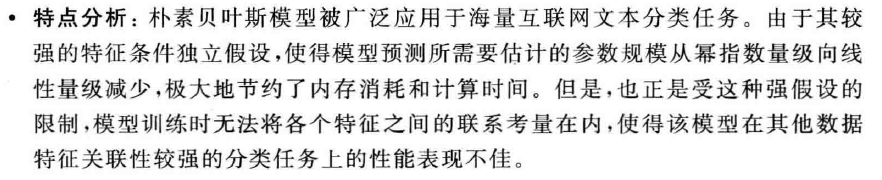

### 4.K- 近邻（鸢尾花例子）
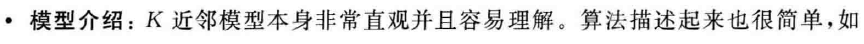

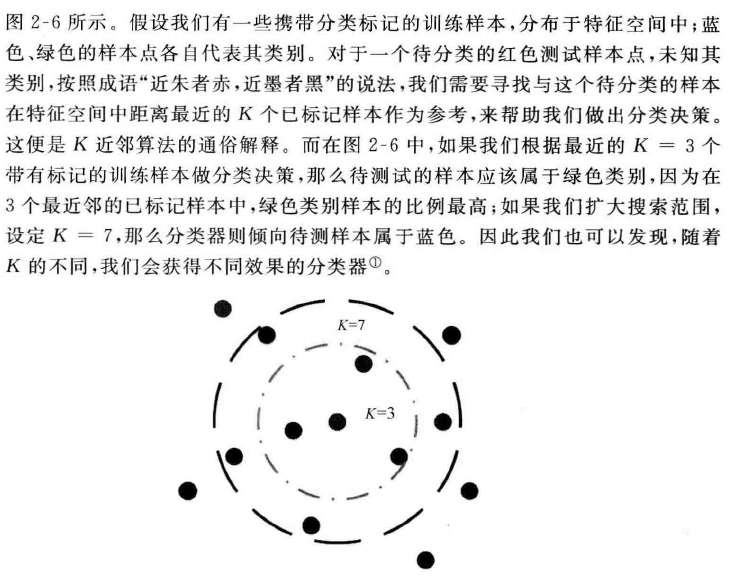

In [29]:
from sklearn.datasets import load_iris

#load the data
iris = load_iris()
print('the shape of data is:' + str(iris.data.shape))
#see the anounces of the data
print(iris.DESCR)

the shape of data is:(150, 4)
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Mis

In [44]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import  StandardScaler
#split the data into train set and test data
x_train , x_test ,y_train , y_test = train_test_split(iris.data , iris.target , test_size = 0.25 , random_state = 33)
#scale the test_data and train_data
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

from sklearn.neighbors import  KNeighborsClassifier
#define the classifier
k = 1
while k < 50:
    knc = KNeighborsClassifier(n_neighbors=k)  
#start train
    knc.fit(x_train , y_train)
#predict
    pre = knc.predict(x_test)
#calculate the accuracy of the models
    print('the accuracy  of k-nearest classifier in test set is : ' + str(knc.score(x_test , y_test)) +str(           ) + 'k is :' + str(k))
    k += 1
# #creat the report 
# from sklearn.metrics import classification_report
# print('the report is :' , classification_report(y_test ,pre , target_names=iris.target_names))

the accuracy  of k-nearest classifier in test set is : 0.710526315789k is :1
the accuracy  of k-nearest classifier in test set is : 0.631578947368k is :2
the accuracy  of k-nearest classifier in test set is : 0.710526315789k is :3
the accuracy  of k-nearest classifier in test set is : 0.684210526316k is :4
the accuracy  of k-nearest classifier in test set is : 0.710526315789k is :5
the accuracy  of k-nearest classifier in test set is : 0.684210526316k is :6
the accuracy  of k-nearest classifier in test set is : 0.763157894737k is :7
the accuracy  of k-nearest classifier in test set is : 0.763157894737k is :8
the accuracy  of k-nearest classifier in test set is : 0.763157894737k is :9
the accuracy  of k-nearest classifier in test set is : 0.736842105263k is :10
the accuracy  of k-nearest classifier in test set is : 0.763157894737k is :11
the accuracy  of k-nearest classifier in test set is : 0.763157894737k is :12
the accuracy  of k-nearest classifier in test set is : 0.763157894737k is

#### 小结
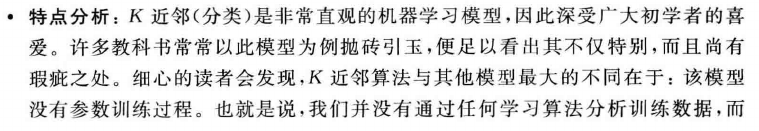

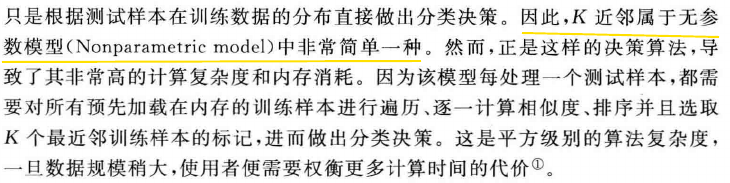

### 5.决策树
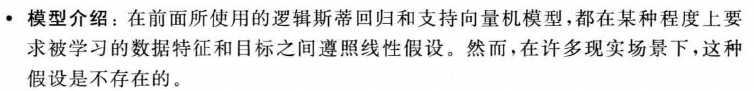

In [49]:
import pandas as pd

#load the data from network
titanic = pd.read_csv('./titanic-data.csv')
# print(titanic.head)

#### 小结
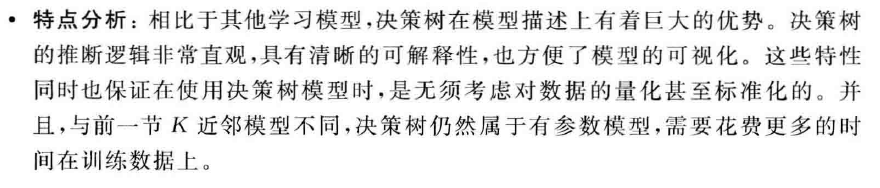

### 6.集成模型
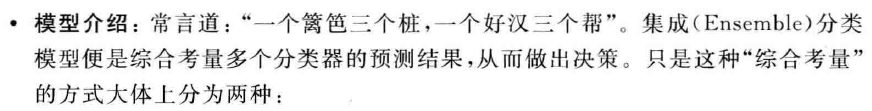

#### 小结
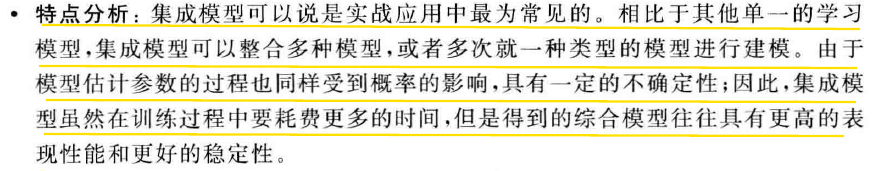

## 回归预测
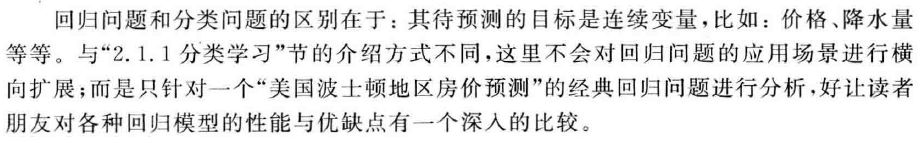

### 线性回归器（波斯顿房价例子）
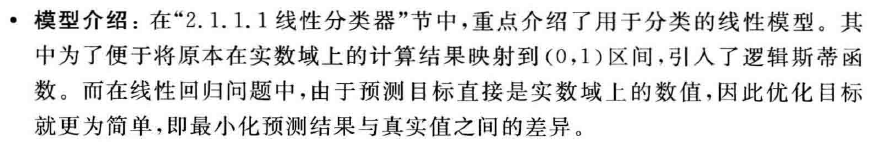

In [50]:
from sklearn.datasets import load_boston 

#load the data
boston = load_boston()
#print the descripe of the data
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [51]:
from sklearn.cross_validation import train_test_split
import numpy as np

x = boston.data
y = boston.target
x_train , x_test ,y_train ,y_test = train_test_split(x , y ,test_size = 0.25 ,random_state = 33)
print('the max target value is ' , np.max(boston.target))
print('the min target value is ' , np.min(boston.target))
print('the average target value is ' , np.mean(boston.target))



the max target value is  50.0
the min target value is  5.0
the average target value is  22.5328063241


In [54]:
from sklearn.preprocessing import StandardScaler

ss_x = StandardScaler()
ss_y = StandardScaler()

x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
y_train = ss_y.fit_transform(y_train)
y_test = ss_y.transform(y_test)

from sklearn.linear_model import LinearRegression ,SGDRegressor

lr  = LinearRegression()
sgdr = SGDRegressor()
lr.fit(x_train ,y_train)
sgdr.fit(x_train ,y_train)
lr_pre = lr.predict(x_test)
sgdr_pre = sgdr.predict(x_test)
print('the accuracy of lr is :' + str(lr.score(x_test ,y_test)))
print('the accuracy of sgdr is :' + str(sgdr.score(x_test ,y_test)))


ValueError: Expected 2D array, got 1D array instead:
array=[ 33.8  20.3  10.2  22.   21.2  24.2  29.   22.7  21.8  34.9  25.2  20.9
  19.4  20.   14.   30.1  33.1  20.6  22.6  33.4  20.1  10.5  15.6  16.8
  22.6  34.6  19.8  17.8  22.   17.4  15.4  16.7  22.6  15.1  21.4  15.3
   7.4  13.9  17.6  25.   46.7  17.1  23.1  18.7  21.9  18.9  26.7  22.3
  25.   14.6  42.8  17.3  22.2  36.5  22.8  19.9  36.2  50.   25.   22.2
  17.5  23.9  19.6  24.7  28.4   8.7  21.7  20.   19.9  24.5  15.    7.
  15.2  20.4   8.5  17.1  30.1  15.   19.4  23.2  17.   18.9  50.   25.
  46.    7.2  17.8  35.1  24.3   5.   16.6  21.8  28.5  22.   20.3  21.7
  26.4  30.7  50.   17.2  26.6  21.   23.4  19.5  20.7  23.3  48.8  15.6
  19.6  17.4  21.7  14.6  37.9   9.7  17.8  12.1  20.1  29.9  26.4  18.8
  32.5  15.7  13.4  21.7  23.6  11.9  13.8  22.2  13.   33.2  50.   22.3
  22.4  23.8  29.1  20.8  23.7  19.8  13.9  28.4  45.4  23.7  50.   18.
  17.1  18.9  10.4  24.7  23.9  23.   20.2   8.5  14.2  20.3  18.5  12.
  19.3  20.6  16.1  12.3  23.1  22.7  20.3  16.7  27.9  21.4   8.1  37.6
  15.6  29.6  22.9  24.8  24.4  50.   28.7  50.   16.5  18.2  50.   16.2
  14.1  21.2  18.4  25.   50.   21.2  20.4  15.2  22.   19.8  22.1  23.9
  24.6  23.9  21.7  44.8   7.2  18.5  20.1  23.3  19.2  29.1  31.   22.9
  27.5  39.8  22.   22.8  22.9  14.3  14.5  22.4  19.3  32.   20.1  18.3
  24.5  18.4  23.1  22.6  20.2  17.8  31.6  43.5  36.4  11.3  20.5  23.2
  29.8  20.6  24.3  18.1  19.1  21.4  31.5  19.2  14.3  24.8  21.1  18.2
  48.3  19.4  21.2  10.9  27.5  34.7  14.4  22.8  17.8  50.   24.4  12.8
  30.8  28.2  25.   33.1  27.5  12.7  43.1  13.4  21.5  33.4  23.8  21.
  26.6  18.5  23.   24.1  20.5  32.2  14.4  11.8  19.5  23.7  13.2  29.
  18.2  18.6  23.   42.3  17.2  16.2  20.   30.3  20.9  20.4  24.8  18.7
  16.8  22.5  18.8  23.7  23.8  19.6  20.4  16.1  44.   19.3  17.4  10.2
  11.7  37.2  11.   23.6  22.8  15.   34.9  17.9  24.4  24.5   6.3  29.4
  10.4  38.7  20.   19.4  37.   50.   18.7  48.5  35.4  23.4   7.   50.
  20.7  35.4   9.6  25.1  16.1  27.   16.6  13.3  25.   24.   19.6  29.6
  21.7  19.1  22.   13.3  27.1  22.9  33.2  13.5  14.5   8.3  41.7  31.2
  23.9  23.1  24.3  18.3  20.8  28.   19.5  21.5  13.1  12.5  31.7  13.1
  23.1  14.5  22.2  13.1  37.3  22.   10.2   5.   19.3  16.   18.6  50.
  31.6  24.1  15.6  19.4  23.3  23.2  13.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.